In [1]:
import geopandas as gpd
from tqdm import tqdm
import libpysal as lp
import json
import pandas as pd

### Get the data in the folder ./LCPS_data for pre-processing. Let's call this `retrieved data`.

In [2]:
def retrieve_data(sy):
    """
    Retrieve data for a given school year (sy)
    """
    data_dir = "./LCPS_data"
    # Read the data files
    schools = gpd.read_file('{}/LCPS_Sites_{}.shp'.format(data_dir, sy))
    students = gpd.read_file('{}/Students_{}.shp'.format(data_dir, sy))
    spas = gpd.read_file('{}/PlanningZones_{}.shp'.format(data_dir, sy))
    
    return schools, students, spas

In [3]:
sy = '2017_2018'

In [4]:
schools, students, spas = retrieve_data(sy)

#### Print out a data instance of the SPAs, SCHOOLs and STUDENTs

In [5]:
for i, spa in spas.iterrows():
    print(spa)
    break

OBJECTID                                                      1
COUNT_                                                        5
STDYAREA                                                 WL03.4
ELEM_                                                       126
INT_                                                        205
HIGH_                                                       311
ELEM_CODE                                                   LOV
INT_CODE                                                    HRM
HIGH_CODE                                                   WHS
DISTRICT                                                     WL
UTILITIES                                                   WOU
SHAPE_Leng                                              47268.8
SHAPE_Area                                          6.39938e+07
STDYAREA_1                                               WL03.4
DISTRICT_1                                                   WL
PLANNING_Z                              

In [6]:
spas.head()

,OBJECTID,COUNT_,STDYAREA,ELEM_,INT_,HIGH_,ELEM_CODE,INT_CODE,HIGH_CODE,DISTRICT,...,HIGH_1,DISTRICT_3,MID_2_2019,HIGH__2019,PLANNING_1,UTILITIE_2,STUDENTS_P,Field39,Field40,geometry
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,WHS,WL,HRM,WHS,WL03.4,WOU,49,None,None,"POLYGON ((11725868.086 7152149.053, 11725870.6..."
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,WHS,WL,HRM,WHS,WL03,WOU,95,None,None,"POLYGON ((11726805.147 7160565.438, 11726826.6..."
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,LVH,WL,BRM,LVH,WL27.2,WOU,17,None,None,"POLYGON ((11720159.464 7099502.139, 11720172.1..."
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,WHS,WL,HRM,WHS,WL32.1,WU,263,None,None,"POLYGON ((11694466.485 7097608.657, 11694418.5..."
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,WHS,WL,HRM,WHS,WL02,WOU,191,None,None,"POLYGON ((11715899.153 7166497.655, 11715932.1..."


In [7]:
spas.plot(column = "HIGH_",cmap='tab20')

In [8]:
spas["HIGH_"].head()

0    311
1    311
2    305
3    311
4    311
Name: HIGH_, dtype: int64

In [9]:
spas[0:5]

,OBJECTID,COUNT_,STDYAREA,ELEM_,INT_,HIGH_,ELEM_CODE,INT_CODE,HIGH_CODE,DISTRICT,...,HIGH_1,DISTRICT_3,MID_2_2019,HIGH__2019,PLANNING_1,UTILITIE_2,STUDENTS_P,Field39,Field40,geometry
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,WHS,WL,HRM,WHS,WL03.4,WOU,49,None,None,"POLYGON ((11725868.086 7152149.053, 11725870.6..."
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,WHS,WL,HRM,WHS,WL03,WOU,95,None,None,"POLYGON ((11726805.147 7160565.438, 11726826.6..."
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,LVH,WL,BRM,LVH,WL27.2,WOU,17,None,None,"POLYGON ((11720159.464 7099502.139, 11720172.1..."
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,WHS,WL,HRM,WHS,WL32.1,WU,263,None,None,"POLYGON ((11694466.485 7097608.657, 11694418.5..."
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,WHS,WL,HRM,WHS,WL02,WOU,191,None,None,"POLYGON ((11715899.153 7166497.655, 11715932.1..."


In [10]:
spas.head()
spas.columns


Index(['OBJECTID', 'COUNT_', 'STDYAREA', 'ELEM_', 'INT_', 'HIGH_', 'ELEM_CODE',
       'INT_CODE', 'HIGH_CODE', 'DISTRICT', 'UTILITIES', 'SHAPE_Leng',
       'SHAPE_Area', 'STDYAREA_1', 'DISTRICT_1', 'PLANNING_Z', 'ELEM', 'MID',
       'HIGH', 'UTILITIE_1', 'DISTRICT_2', 'MID_2018', 'HIGH_2018', 'PK', 'KG',
       'GR1', 'GR2', 'GR3', 'GR4', 'GR5', 'GR6', 'GR7', 'GR8', 'GR9', 'GR10',
       'GR11', 'GR12', 'TOTAL_KG_5', 'TOTAL_6_8', 'TOTAL_9_12', 'TOTAL_KG_1',
       'TOTAL_PK_1', 'ELEM_1', 'MID_1', 'HIGH_1', 'DISTRICT_3', 'MID_2_2019',
       'HIGH__2019', 'PLANNING_1', 'UTILITIE_2', 'STUDENTS_P', 'Field39',
       'Field40', 'geometry'],
      dtype='object')

In [11]:
print("The total number of students is ", sum(spas['TOTAL_KG_1']), "for all the 446 rows")
#used TOT_POP as string but it gave errors as not a column so have to do with TOTAL_KG_1 now

The total number of students is  80345 for all the 446 rows


In [12]:
#needed_columns=spas[["ELEM_CODE", "ELEM_", "ELEM_POP"]]
#help(needed_columns)

#aggregate_data=needed_columns.dissolve(by='ELEM_CODE', aggfunc='sum')
#aggregate_data.head()

#dissolve(by='ELEM_CODE', aggfunc='sum')

#needed_columns.groupby(['ELEM_CODE']).mean()
#needed_columns.head()
#needed_columns.groupby(['ELEM_CODE']).sum()

In [13]:
# spas.info()

# Students percentages

In [14]:

#students.info()
needed_ethnicities=students[["ObjectID", "ETHNIC","ELEM_CODE"]]
grouped_data=needed_ethnicities.groupby(['ELEM_CODE', 'ETHNIC']).count()
#count is not percentage

#students.head()
#help (students.groupby)
#students.groupby(['ELEM_CODE']).sum()

In [15]:
grouped_data
#this displays all headers I want to see
grouped_data.columns
#only OBJECT ID shows up, the other two headers are not regarded as columns. Why is that? How do I access them?

Index(['ObjectID'], dtype='object')

In [16]:
school_codes = needed_ethnicities.ELEM_CODE.unique()
#len(needed_ethnicities.ELEM_CODE.unique())

denominators=needed_ethnicities.groupby(['ELEM_CODE']).count()
for code in school_codes:
     if code is not None:
        
        print("\n", code)
        
        school_percentage = grouped_data.loc[code]/denominators.loc[code]["ETHNIC"]
        print(school_percentage)


 DIS
        ObjectID
ETHNIC          
A       0.322089
B       0.091948
H       0.120239
M2      0.054951
N       0.004897
P       0.002720
W       0.403156

 CAT
        ObjectID
ETHNIC          
A       0.031447
B       0.057747
H       0.181818
M2      0.048027
N       0.003431
P       0.001715
W       0.675815

 LOW
        ObjectID
ETHNIC          
A       0.126600
B       0.050498
H       0.079659
M2      0.050498
N       0.003556
P       0.000711
W       0.688478

 DOM
        ObjectID
ETHNIC          
A       0.212868
B       0.117258
H       0.164762
M2      0.044498
N       0.003608
P       0.000601
W       0.456404

 LEG
        ObjectID
ETHNIC          
A       0.338268
B       0.044863
H       0.057873
M2      0.067743
N       0.001346
P       0.000897
W       0.489009

 HUT
        ObjectID
ETHNIC          
A       0.266556
B       0.054636
H       0.115894
M2      0.064570
N       0.008830
P       0.001104
W       0.488411

 CED
        ObjectID
ETHNIC          
A     

W       0.841897

 MTE
        ObjectID
ETHNIC          
A       0.427302
B       0.059683
H       0.072381
M2      0.048254
N       0.010794
P       0.000635
W       0.380952


In [17]:
# denominators = needed_ethnicities.groupby(['ELEM_CODE']).count()
#grouped_data["LOV"]/denominators["LOV"]
#grouped_data.get_group("ALO")/
#denominators.loc["ELEM_CODE","ALD"]
#denominators.loc[denominators["ELEM_CODE"]=="ALD"]

#denominators.columns
#finding percentages
grouped_data.loc["ALD"]/denominators.loc["ALD"]["ETHNIC"]
grouped_data[["ObjectID"]]/denominators

#print(denominators) 368x2 columns
#print(grouped_data) 368x1 columns

#sum_denominators = needed_ethnicities.groupby(['ELEM_CODE']).sum()
#print(sum_denominators)

ETHNIC  ObjectID
ELEM_CODE ETHNIC                  
ALD       A          NaN  0.083130
          B          NaN  0.073350
          H          NaN  0.156479
          M2         NaN  0.068460
          N          NaN  0.002445
...                  ...       ...
WAT       B          NaN  0.027368
          H          NaN  0.040000
          M2         NaN  0.044211
          N          NaN  0.004211
          W          NaN  0.840000

[368 rows x 2 columns]

# how to change the assignments of areas to schools






























In [18]:
#spas.loc [0, "ELEM_CODE"]= "changed_assignment"
#spas.loc [0, "SPA"]= "WL03.4"

#spas.head()
is_LOV = spas ["ELEM_CODE"] == "LOV" 
spas.loc[is_LOV, ("ELEM_CODE", )]  = "temporary_change"
spas.head(10)

is_LUC = spas ["ELEM_CODE"] == "LUC" 
spas.loc[is_LUC, ("ELEM_CODE", )]  = "LOV"


spas.loc[is_LOV, ("ELEM_CODE", )]  = "LUC"
spas.head(20)

#Trying to change LOV to something different,
#began with a temporary_change assignment and finally set that to LUC

,OBJECTID,COUNT_,STDYAREA,ELEM_,INT_,HIGH_,ELEM_CODE,INT_CODE,HIGH_CODE,DISTRICT,...,HIGH_1,DISTRICT_3,MID_2_2019,HIGH__2019,PLANNING_1,UTILITIE_2,STUDENTS_P,Field39,Field40,geometry
0,1,5.0,WL03.4,126,205,311,LUC,HRM,WHS,WL,...,WHS,WL,HRM,WHS,WL03.4,WOU,49,None,None,"POLYGON ((11725868.086 7152149.053, 11725870.6..."
1,2,5.0,WL03,126,205,311,LUC,HRM,WHS,WL,...,WHS,WL,HRM,WHS,WL03,WOU,95,None,None,"POLYGON ((11726805.147 7160565.438, 11726826.6..."
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,LVH,WL,BRM,LVH,WL27.2,WOU,17,None,None,"POLYGON ((11720159.464 7099502.139, 11720172.1..."
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,WHS,WL,HRM,WHS,WL32.1,WU,263,None,None,"POLYGON ((11694466.485 7097608.657, 11694418.5..."
4,5,5.0,WL02,126,205,311,LUC,HRM,WHS,WL,...,WHS,WL,HRM,WHS,WL02,WOU,191,None,None,"POLYGON ((11715899.153 7166497.655, 11715932.1..."
5,6,5.0,WL01,132,205,311,MTV,HRM,WHS,WL,...,WHS,WL,HRM,WHS,WL01,WOU,53,None,None,"POLYGON ((11709341.498 7147774.958, 11709316.1..."
6,7,1.0,CL01,128,211,314,LOV,SMM,THS,CL,...,THS,CL,SMM,THS,CL01,WOU,48,None,None,"POLYGON ((11762515.349 7141310.177, 11762191.6..."
7,8,1.0,CL02,128,211,314,LOV,SMM,THS,CL,...,THS,CL,SMM,THS,CL02,WOU,492,None,None,"POLYGON ((11763559.098 7140746.475, 11763578.5..."
8,9,5.0,WL55,142,205,311,WAT,HRM,WHS,WL,...,WHS,WL,HRM,WHS,WL55,WOU,12,None,None,"POLYGON ((11743508.857 7139679.777, 11743061.7..."
9,10,5.0,WL56,142,205,311,WAT,HRM,WHS,WL,...,WHS,WL,HRM,WHS,WL56,WOU,109,None,None,"POLYGON ((11744311.447 7128275.012, 11744378.8..."


In [19]:
for ind, school in schools.iterrows():
    print(school)
    break

OBJECTID                                                1
SCH_CODE                                              HCA
CLASS                                             CHARTER
SCH_NUM                                               119
NAME                            HILLSBORO CHARTER ACADEMY
DATE_OPENE                                           1966
BUILDING_D                                              7
CLASSROOMS                                              6
SPECIAL_SI                                              0
TRAILERS                                                0
SCHL_CODE                                             119
STRT_GRD                                               -1
END_GRD                                                 5
ELEM_                                                 119
INT_                                                    0
MID_                                                    0
HIGH_                                                   0
CAPACITY      

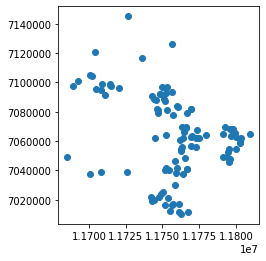

In [20]:
schools.plot()

In [21]:
for index, student in students.iterrows():
    print(student)
    break

ObjectID                                                1
ARC_Single                     21365 FITZGERALD DR, 20147
Loud_ID                                            100011
Address                                             21365
Address_Ex                                           None
ADDwEXT                                             21365
Prefix                                               None
Street_Nam                                     FITZGERALD
Street_Typ                                             DR
Suffix                                               None
Town                                              ASHBURN
Zip_1                                               20147
Subdivisio                                  FARMWELL HUNT
GRID_CODE                                          100011
GRADE                                                  13
IEP_FLAG                                                N
GENDER                                                  M
ETHNIC        

### Printout the CRS of the SPAs, SCHOOLs and STUDENTs

In [22]:
spas.crs    # Printout the CRS

{'init': 'epsg:2924'}

In [23]:
spas.keys()

Index(['OBJECTID', 'COUNT_', 'STDYAREA', 'ELEM_', 'INT_', 'HIGH_', 'ELEM_CODE',
       'INT_CODE', 'HIGH_CODE', 'DISTRICT', 'UTILITIES', 'SHAPE_Leng',
       'SHAPE_Area', 'STDYAREA_1', 'DISTRICT_1', 'PLANNING_Z', 'ELEM', 'MID',
       'HIGH', 'UTILITIE_1', 'DISTRICT_2', 'MID_2018', 'HIGH_2018', 'PK', 'KG',
       'GR1', 'GR2', 'GR3', 'GR4', 'GR5', 'GR6', 'GR7', 'GR8', 'GR9', 'GR10',
       'GR11', 'GR12', 'TOTAL_KG_5', 'TOTAL_6_8', 'TOTAL_9_12', 'TOTAL_KG_1',
       'TOTAL_PK_1', 'ELEM_1', 'MID_1', 'HIGH_1', 'DISTRICT_3', 'MID_2_2019',
       'HIGH__2019', 'PLANNING_1', 'UTILITIE_2', 'STUDENTS_P', 'Field39',
       'Field40', 'geometry'],
      dtype='object')

In [24]:
[x for x in list(spas.PLANNING_1) if x.startswith('DS07')]


['DS07.2',
 'DS07.7',
 'DS07.6',
 'DS07.5',
 'DS07.8',
 'DS07.1',
 'DS07',
 'DS07.9',
 'DS07.3',
 'DS07.4',
 'DS07.11']

In [25]:
students.crs

{'init': 'epsg:2924'}

In [26]:
schools.crs

{'init': 'epsg:2924'}

### Read the data (supplied with the algorithm) in the folder './data'. Let's call this `new data`.

In [27]:
spas_new = gpd.read_file('./data/SPAs.json')

In [28]:
[x for x in list(spas_new.SPA) if x.startswith('DS07')]

['DS07.2',
 'DS07.12',
 'DS07.7',
 'DS07.6',
 'DS07.5',
 'DS07.8',
 'DS07.1',
 'DS07',
 'DS07.9',
 'DS07.3',
 'DS07.4',
 'DS07.11']

In [29]:
for i, s in spas_new.iterrows():
    print(s)
    break

OBJECTID                                                      1
COUNT_                                                        5
SPA                                                      WL03.4
ELEM_                                                       126
INT_                                                        205
HIGH_                                                       311
ELEM_CODE                                                   LOV
ELEM_POP                                                     31
MID_CODE                                                    HRM
MID_POP                                                      12
HIGH_CODE                                                   WHS
HIGH_POP                                                     13
DISTRICT                                                     WL
UTILITIES                                                   WOU
SHAPE_Leng                                              47261.2
SHAPE_Area                              

#### We have to modify the SPAs in `retrieved data` to match the entries in `new data`

In [30]:
fields = ['ELEM_1', 'MID_1', 'HIGH_1', 'DISTRICT_3', 'MID_2_2019', 'HIGH__2019',
          'PLANNING_1', 'UTILITIE_2', 'STUDENTS_P', 'Field39', 'Field40']
spas.drop(fields, axis=1, inplace=True)
spas.head()

,OBJECTID,COUNT_,STDYAREA,ELEM_,INT_,HIGH_,ELEM_CODE,INT_CODE,HIGH_CODE,DISTRICT,...,GR9,GR10,GR11,GR12,TOTAL_KG_5,TOTAL_6_8,TOTAL_9_12,TOTAL_KG_1,TOTAL_PK_1,geometry
0,1,5.0,WL03.4,126,205,311,LUC,HRM,WHS,WL,...,5,3,3,3,23,10,14,47,49,"POLYGON ((11725868.086 7152149.053, 11725870.6..."
1,2,5.0,WL03,126,205,311,LUC,HRM,WHS,WL,...,10,12,9,10,32,22,41,95,95,"POLYGON ((11726805.147 7160565.438, 11726826.6..."
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,2,2,10,3,4,17,17,"POLYGON ((11720159.464 7099502.139, 11720172.1..."
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,13,14,15,18,146,53,60,259,263,"POLYGON ((11694466.485 7097608.657, 11694418.5..."
4,5,5.0,WL02,126,205,311,LUC,HRM,WHS,WL,...,12,25,15,19,76,40,71,187,191,"POLYGON ((11715899.153 7166497.655, 11715932.1..."


In [31]:
# Adding new fields and renaming some existing ones
spas = spas.rename(columns={"INT_CODE": "MID_CODE"})
spas = spas.rename(columns={"STDYAREA": "SPA"})
new_fields = ['ELEM_POP', 'MID_POP', 'HIGH_POP', 'TOT_POP']    # Population of ELEM, MID, HIGH and TOTAL

for f in new_fields:
    spas[f] = 0

##### Do point-in-polygon test to find out number of students attending public schools in LCPS and residing within Loudoun county, VA.

In [32]:
spas.columns

Index(['OBJECTID', 'COUNT_', 'SPA', 'ELEM_', 'INT_', 'HIGH_', 'ELEM_CODE',
       'MID_CODE', 'HIGH_CODE', 'DISTRICT', 'UTILITIES', 'SHAPE_Leng',
       'SHAPE_Area', 'STDYAREA_1', 'DISTRICT_1', 'PLANNING_Z', 'ELEM', 'MID',
       'HIGH', 'UTILITIE_1', 'DISTRICT_2', 'MID_2018', 'HIGH_2018', 'PK', 'KG',
       'GR1', 'GR2', 'GR3', 'GR4', 'GR5', 'GR6', 'GR7', 'GR8', 'GR9', 'GR10',
       'GR11', 'GR12', 'TOTAL_KG_5', 'TOTAL_6_8', 'TOTAL_9_12', 'TOTAL_KG_1',
       'TOTAL_PK_1', 'geometry', 'ELEM_POP', 'MID_POP', 'HIGH_POP', 'TOT_POP'],
      dtype='object')

In [33]:
# spas['SPA'] = spas['STDYAREA_1']

In [34]:
set(students['GRADE'])    # Possible values of grade

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

In [35]:
count = 0
others = 0
for index, student in tqdm(students.iterrows()):
    student_location = student.geometry
    student_grade = student['GRADE']
    legit = True
    for ind, spa in spas.iterrows():
        
        if student_location.within(spa.geometry):
            count += 1
            if 0 < student_grade < 6 or student_grade == 13:    # ELEMENTARY School has grades KG-5
                spas.at[ind, 'ELEM_POP'] = spas['ELEM_POP'][ind] + 1
            elif 5 < student_grade < 9:    # MIDDLE School has grades 6-8
                spas.at[ind, 'MID_POP'] = spas['MID_POP'][ind] + 1
            elif 8 < student_grade < 13:    # HIGH School has grades 9-12
                spas.at[ind, 'HIGH_POP'] = spas['HIGH_POP'][ind] + 1
            else:
                legit = False
                others += 1
#                 print(others)
                
            if legit:
                spas.at[ind, 'TOT_POP'] = spas['TOT_POP'][ind] + 1
                
            break
            
total_students = len(students)


81427it [1:11:48, 18.90it/s]


In [36]:
print('{}/{} students living inside LCPS\' boundary are considered for redistricting'.format(count - others,
                                                                                             total_students))
print('{}/{} students living inside LCPS\' boundary are ignored'.format(others, total_students))
print('{}/{} students living outside LCPS\' boundary are ignored'.format(total_students - count,
                                                                         total_students))

80345/81427 students living inside LCPS' boundary are considered for redistricting
1054/81427 students living inside LCPS' boundary are ignored
28/81427 students living outside LCPS' boundary are ignored


In [37]:
count = 0
others = 0
for index, school in tqdm(schools.iterrows()):
    school_location = school.geometry
    legit = True
    for ind, spa in spas.iterrows():
        
        if school_location.within(spa.geometry):
            count += 1
            if spa['STDYAREA_1']:
                print(spa['STDYAREA_1'])
                schools.at[index, 'SPA'] = str(spa['STDYAREA_1'])
            else:
                legit = False
                others += 1
                
            if legit:
                pass
                
            break
#         assert 0, 'not contained'
            


0it [00:00, ?it/s]

WL53


1it [00:00,  7.69it/s]

DN46.1


2it [00:00,  7.40it/s]

EL05
DS13


4it [00:00,  8.52it/s]

CL27
DS12.3
WL38


7it [00:00, 10.67it/s]

DN30
CL27


9it [00:00, 10.88it/s]

EL03
EL03
EL27


12it [00:00, 12.72it/s]

EL27
CL37


14it [00:01, 11.19it/s]

DN36.3
DS13.1
WL31
CL34


18it [00:01, 12.89it/s]

CL10.2
CL25.1
CL27


21it [00:01, 15.06it/s]

CL38
CL37.2
CL07
WL30


25it [00:01, 18.53it/s]

DN33
DN01.4
DN01.3


28it [00:01, 18.49it/s]

DS17
DN15
DN15


31it [00:01, 19.32it/s]

WL11
WL27.1
WL67


34it [00:02, 18.11it/s]

CL36
DS12.2
DN05


37it [00:02, 17.97it/s]

CL35
CL15.3
DS07.7


40it [00:02, 19.66it/s]

CL15.3
WL45
WL20


43it [00:02, 17.09it/s]

DS05
DN32.3


45it [00:02, 17.45it/s]

DN32.3
EL09
WL19


48it [00:02, 19.23it/s]

DS14
WL22.1
WL22.1


51it [00:03, 16.05it/s]

DN10
EL11


53it [00:03, 16.11it/s]

DN13
EL24


55it [00:03, 14.13it/s]

EL12
EL20


57it [00:03, 12.23it/s]

DN17.1
DN19


59it [00:03, 11.85it/s]

CL13
DN27


61it [00:03, 11.15it/s]

EL16
EL37
WL29.1
WL29.1


65it [00:04, 13.39it/s]

WL29
EL37


67it [00:04, 14.23it/s]

EL48
DN12


69it [00:04, 12.25it/s]

EL38
DN50.2


71it [00:04, 10.40it/s]

EL39
WL29.1


73it [00:04, 11.96it/s]

DS13.4
EL44


75it [00:05,  9.79it/s]

EL43
DN36.1


77it [00:05, 10.81it/s]

DS12.5
WL03.2


79it [00:05,  9.46it/s]

CL02
CL07.2
CL07.2


82it [00:05, 11.20it/s]

WL67
CL07


84it [00:05,  9.62it/s]

DN08.5
DN51


86it [00:06, 10.09it/s]

DN47
DN47
DN36


89it [00:06, 11.00it/s]

DN04
DS11


91it [00:06, 12.16it/s]

CL07.2
DS07.5
DN23


94it [00:06, 14.09it/s]

DN08.4
DS12.5


96it [00:06, 13.22it/s]

DS07.5
CL25.1


98it [00:06, 13.92it/s]

DN01.4
DS07.11


100it [00:07, 13.04it/s]

DN36.3
DN36.3
CL34.1


103it [00:07, 15.27it/s]

DS07.3
DS07.3


105it [00:07, 14.15it/s]


In [38]:
len(spas)

446

In [39]:
schools['SCHOOL_TYP'] = ''

schools.loc[schools['CLASS'] == 'ELEMENTARY','SCHOOL_TYP'] = 'ES'

schools.loc[schools['CLASS'] == 'MIDDLE','SCHOOL_TYP'] = 'MS'

schools.loc[schools['CLASS'] == 'HIGH','SCHOOL_TYP'] = 'HS'

In [40]:
spas_new.keys()

#edited this from spas.keys()

Index(['OBJECTID', 'COUNT_', 'SPA', 'ELEM_', 'INT_', 'HIGH_', 'ELEM_CODE',
       'ELEM_POP', 'MID_CODE', 'MID_POP', 'HIGH_CODE', 'HIGH_POP', 'DISTRICT',
       'UTILITIES', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'],
      dtype='object')

### Transform the CRS of the `retrieved data` to match `new data`. We need to project the shapefiles into a new coordinate system to ensure that the data you are working with uses common geometric projection. For more details refer to the [link](https://geopandas.org/projections.html).

In [41]:
new_crs = spas_new.crs

In [42]:
new_crs

{'init': 'epsg:2924'}

In [43]:
spas = spas.to_crs(new_crs)

In [44]:
schools['SCHOOL_TYP'].fillna('')

0        
1      ES
2      ES
3      ES
4      HS
       ..
100    ES
101      
102      
103      
104      
Name: SCHOOL_TYP, Length: 105, dtype: object

In [45]:
schools = schools.to_crs(new_crs)

In [46]:
# Check if the projections have been reprojected 
print(spas.crs, schools.crs)

{'init': 'epsg:2924'} {'init': 'epsg:2924'}


In [47]:
spas.keys()

Index(['OBJECTID', 'COUNT_', 'SPA', 'ELEM_', 'INT_', 'HIGH_', 'ELEM_CODE',
       'MID_CODE', 'HIGH_CODE', 'DISTRICT', 'UTILITIES', 'SHAPE_Leng',
       'SHAPE_Area', 'STDYAREA_1', 'DISTRICT_1', 'PLANNING_Z', 'ELEM', 'MID',
       'HIGH', 'UTILITIE_1', 'DISTRICT_2', 'MID_2018', 'HIGH_2018', 'PK', 'KG',
       'GR1', 'GR2', 'GR3', 'GR4', 'GR5', 'GR6', 'GR7', 'GR8', 'GR9', 'GR10',
       'GR11', 'GR12', 'TOTAL_KG_5', 'TOTAL_6_8', 'TOTAL_9_12', 'TOTAL_KG_1',
       'TOTAL_PK_1', 'geometry', 'ELEM_POP', 'MID_POP', 'HIGH_POP', 'TOT_POP'],
      dtype='object')

In [48]:
adjacency_matrix = dict(lp.weights.Rook.from_dataframe(spas, idVariable="STDYAREA_1"))
for key in adjacency_matrix:
    adjacency_matrix[key] = list(adjacency_matrix[key].keys())
with open("data/nbrlist_SPA.json", "w") as fp:
    json.dump(adjacency_matrix, fp)

### Write out the updated data as geojson files

In [49]:
def write_data(schools, spas, students, sy):
    """
    Retrieve data for a given school year (sy)
    """
    data_dir = "data"
    # Read the data files
    schools.to_file('{}/Schools_{}.json'.format(data_dir, sy), driver='GeoJSON')
    spas.to_file('{}/SPAs_{}.json'.format(data_dir, sy), driver='GeoJSON')
    students.to_file('{}/Students_{}.json'.format(data_dir, sy), driver='GeoJSON')
    
    #added the last line for students here and modified write_data to include students

In [50]:
write_data(schools, spas, students, sy)

In [51]:
spas.head()


,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,TOTAL_KG_5,TOTAL_6_8,TOTAL_9_12,TOTAL_KG_1,TOTAL_PK_1,geometry,ELEM_POP,MID_POP,HIGH_POP,TOT_POP
0,1,5.0,WL03.4,126,205,311,LUC,HRM,WHS,WL,...,23,10,14,47,49,"POLYGON ((11725868.086 7152149.053, 11725870.6...",23,10,14,47
1,2,5.0,WL03,126,205,311,LUC,HRM,WHS,WL,...,32,22,41,95,95,"POLYGON ((11726805.147 7160565.438, 11726826.6...",32,22,41,95
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,10,3,4,17,17,"POLYGON ((11720159.464 7099502.139, 11720172.1...",10,3,4,17
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,146,53,60,259,263,"POLYGON ((11694466.485 7097608.657, 11694418.5...",146,53,60,259
4,5,5.0,WL02,126,205,311,LUC,HRM,WHS,WL,...,76,40,71,187,191,"POLYGON ((11715899.153 7166497.655, 11715932.1...",76,40,71,187


# New Plans from REGAL algorithm output

In [52]:
output_df = pd.read_json('results_for_original_data/SA/run7_ES_SA.json')
output_df.head()

#read the information in the json file and see what it presents
#it makes the outermost keys as the column headers. 
# the next level keys in the nested dictionary became the rows

                   

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
properties,"{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...",...,"{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'...","{'AlgParams': {'w1': 0.0, 'w2': 0.0, 'epsilon'..."
info,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...,{'Existing': {'zones': {'LOV': {'STATE': ['WL0...


In [53]:
# Still experimented here and found that the keys wanted was in 25 -> info -> Final -> zoneIDs
with open('results_for_original_data/SA/run7_ES_SA.json') as file:
    obj = json.loads(''.join(file.readlines()))
                      
# obj.keys()
# obj['25'].keys()
# obj['25']['info']   
# obj['25']['info']['Final'].keys()
# obj['25']['info']['Final']['zoneIds'].keys()
#values(), items()  


# obj['25']['info']['Final']['zoneIds'].items()
#returns a list with planning zone and corresponding elem_code

In [54]:
output_df2 = pd.DataFrame({"SPA":[], "New_Elem_Code":[]})


#Load the file as json. 
with open('results_for_original_data/SA/run7_ES_SA.json') as file:
    #readlines() reads the file as string and loads() loads it into a dict
    obj = json.loads(''.join(file.readlines()))
    
    #Then iterate its items() as key value pairs
    for spa_code, elem_code in obj['25']['info']['Final']['zoneIds'].items():
        output_df2.loc[len(output_df2.index)] = [spa_code, elem_code]

In [55]:
output_df2

,SPA,New_Elem_Code
0,CL01,LUC
1,CL02,LUC
2,CL02.1,LUC
3,CL03,WAT
4,CL04,FHR
...,...,...
441,WL62,FHR
442,WL63,LIN
443,WL65,BAN
444,WL66,BAN


In [56]:
spas.head()

#which also has an SPA column. Since the SPA column is unique we decided to merge on that

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,TOTAL_KG_5,TOTAL_6_8,TOTAL_9_12,TOTAL_KG_1,TOTAL_PK_1,geometry,ELEM_POP,MID_POP,HIGH_POP,TOT_POP
0,1,5.0,WL03.4,126,205,311,LUC,HRM,WHS,WL,...,23,10,14,47,49,"POLYGON ((11725868.086 7152149.053, 11725870.6...",23,10,14,47
1,2,5.0,WL03,126,205,311,LUC,HRM,WHS,WL,...,32,22,41,95,95,"POLYGON ((11726805.147 7160565.438, 11726826.6...",32,22,41,95
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,10,3,4,17,17,"POLYGON ((11720159.464 7099502.139, 11720172.1...",10,3,4,17
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,146,53,60,259,263,"POLYGON ((11694466.485 7097608.657, 11694418.5...",146,53,60,259
4,5,5.0,WL02,126,205,311,LUC,HRM,WHS,WL,...,76,40,71,187,191,"POLYGON ((11715899.153 7166497.655, 11715932.1...",76,40,71,187


In [57]:
# adding new column to spa dataframe
new_spas2 = pd.merge(spas, output_df2, on='SPA')

In [58]:
new_spas2[['ELEM_CODE', 'New_Elem_Code']]

#ELEM_CODE now refers to the old plan assignment and the New_Elem_Code refers to the 
#new plan from the output of the REGAL algorithm

,ELEM_CODE,New_Elem_Code
0,LUC,LOV
1,LUC,LOV
2,HAM,HAM
3,MTV,RHL
4,LUC,RHL
...,...,...
441,ALD,ALD
442,BUF,PNB
443,PNB,PNB
444,ARC,GPE


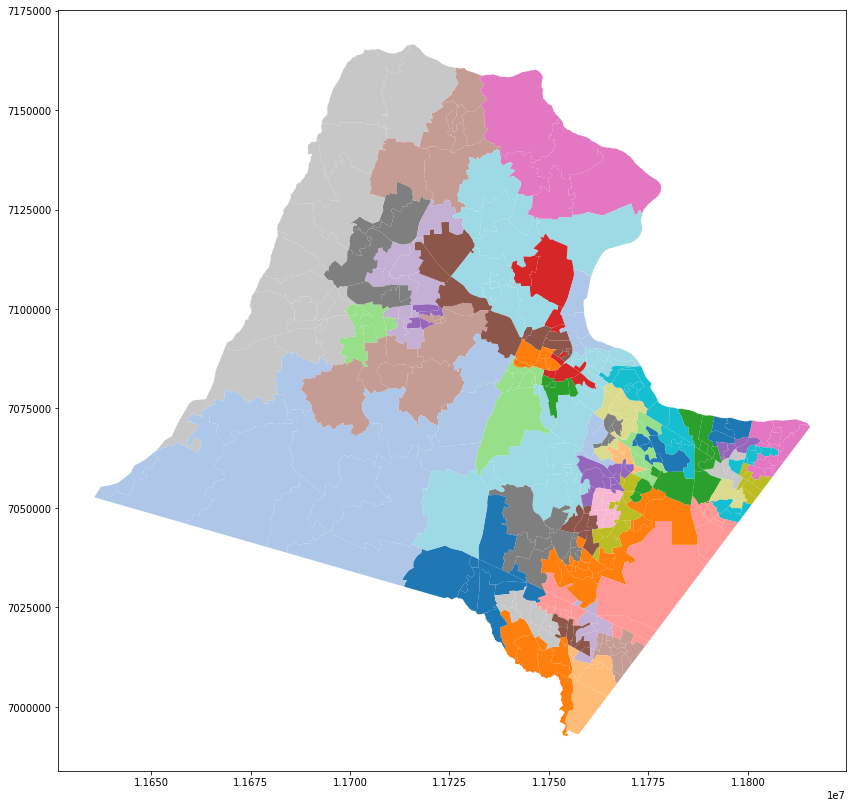

In [59]:
new_spas2.plot(column="New_Elem_Code",cmap="tab20", figsize=(15,14))

#new addition to see contiguity

#Is there a quantification for contiguity? Are there any other measures for contiguous?
#Objective criteria tells us that

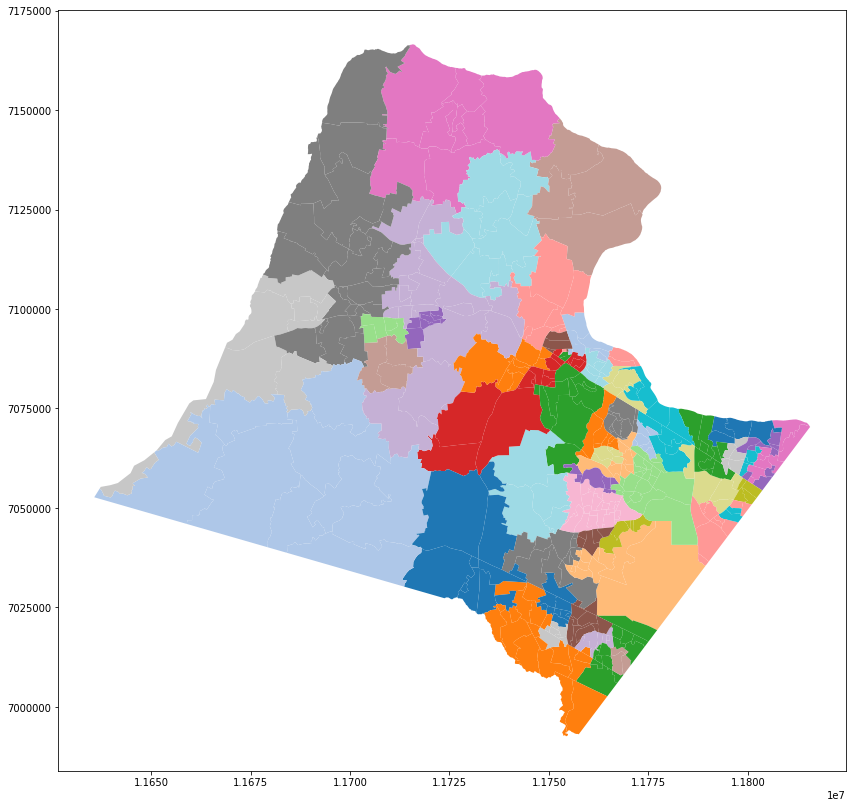

In [67]:
spas.plot(column="ELEM_CODE",cmap="tab20", figsize=(15,14))

In [60]:
# import geopandas as gpd
# import pandas as pd

In [61]:
#spas_processed = gpd.read_file('new_SPAs_2017_2018.json', driver='GeoJSON')
spas_processed = gpd.read_file('./data/new_SPAs_2017_2018.json', driver='GeoJSON')
spas_processed.head()

#new line to run the newly downloaded json files, should move around anywhere.

,OBJECTID,COUNT_,SPA,ELEM_,INT_,HIGH_,ELEM_CODE,MID_CODE,HIGH_CODE,DISTRICT,...,HIGH_POP_N,HIGH_POP_P,TOT_POP_A,TOT_POP_W,TOT_POP_M2,TOT_POP_B,TOT_POP_H,TOT_POP_N,TOT_POP_P,geometry
0,1,5.0,WL03.4,126,205,311,LOV,HRM,WHS,WL,...,0,0,1,37,0,2,7,0,0,"POLYGON ((11725868.086 7152149.054, 11725870.6..."
1,2,5.0,WL03,126,205,311,LOV,HRM,WHS,WL,...,0,0,0,83,5,0,6,1,0,"POLYGON ((11726805.147 7160565.439, 11726826.6..."
2,3,5.0,WL27.2,118,202,305,HAM,BRM,LVH,WL,...,0,0,0,11,0,1,5,0,0,"POLYGON ((11720159.464 7099502.139, 11720172.1..."
3,4,5.0,WL32.1,132,205,311,MTV,HRM,WHS,WL,...,0,0,8,205,14,8,23,1,0,"POLYGON ((11694466.485 7097608.657, 11694418.5..."
4,5,5.0,WL02,126,205,311,LOV,HRM,WHS,WL,...,0,0,9,170,3,0,5,0,0,"POLYGON ((11715899.154 7166497.655, 11715932.1..."


In [62]:
# There were 3 different files in the output, but only SA was analyzed. 